In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from sklearn.svm import SVC
import plotly.express as px

In [5]:
def making_df(slope_type=1,n=100, p1=100, p2=30, p3=2):
    np.random.seed(n)

    p=np.random.randn(p1)*p2
    q=np.random.randn(p1)*p2
    
    if slope_type == 1:        
        r=p+p3*p.max()
        s=q-p3*q.max()
    else:
        r=p+p3*p.max()
        s=q+p3*q.max()        


    df1 = pd.DataFrame({'ones':np.ones(len(p)),'feature1':p,
                       'feature2':q, 'label':np.ones(len(p))})

    df2 = pd.DataFrame({'ones':np.ones(len(r)),'feature1':r,
                       'feature2':s, 'label':[-1]*len(r)})

    df = pd.concat([df1,df2], axis=0)
    df = df.sample(n=len(df))
    return [df,p,q,r,s]


##################################################################################################################
##################################################################################################################
##################################################################################################################



def sup(weight, epsilon=0, test_neg_pos=0, test_pos_pos=0, overfit=False, show=False, seed=15):
    
    np.random.seed(seed)
    
    def nor(lst):
        factor = (1/sum([i**2 for i in lst[:2]]))**0.5
        return [i*factor for i in lst[:2]]

    a = nor(weight)[0]
    b = nor(weight)[1]
    c = weight[2]

    def st(a,b,c):
        slope = -(a/b)
        intercept = -(c/b)

        x = np.concatenate([p,r])
        y = slope*x + intercept

        return [x,y]


    df['distances'] = np.matmul(np.array(df.iloc[:,:3]),np.array([c,a,b]))

    df['formulation'] = df.label * df.distances
    
    if -(a/b)>0:
        df_neg = df[df.label<0].sort_values('formulation')
        df_pos = df[df.label>0].sort_values('formulation')
    elif -(a/b)<0:
        df_neg = df[df.label<0].sort_values('formulation', ascending=False)
        df_pos = df[df.label>0].sort_values('formulation', ascending=False)

        

    neg_dist = df_neg.formulation.values[0]
    pos_dist = df_pos.formulation.values[0]


    
    def vert_dist(distance):
        import math
        slope = -(a/b)
        angle = abs(math.degrees(math.atan(slope)))
        vertical = distance/math.cos(math.radians(angle))
        return vertical

    neg_vert_dist = vert_dist(neg_dist)
    pos_vert_dist = vert_dist(pos_dist)
    



    intercept = -(c/b)
    pos_intercept = intercept + pos_vert_dist
    neg_intercept = intercept - neg_vert_dist
    c_intercept = min([neg_intercept, pos_intercept]) + abs((neg_intercept - pos_intercept)/2)

    c_pos = -(pos_intercept*b)
    c_neg = -(neg_intercept*b)
    c_new = -(c_intercept*b)


    if overfit:
        epsilon = np.random.rand(1)
        
    margin = (neg_dist+pos_dist)*(1-epsilon)
    distance = margin/2
    dist_vert_dist = vert_dist(distance)

    pos_intercept = c_intercept + dist_vert_dist
    neg_intercept = c_intercept - dist_vert_dist
    c_pos_new = -(pos_intercept*b)
    c_neg_new = -(neg_intercept*b) 


    plt.figure(figsize=(20,8))
    plt.scatter(p, q, facecolors='purple', marker='_', s=100)
    plt.scatter(r,s, facecolors='red', marker='+', s=100)
    plt.xlabel('Features', fontsize=16)
    plt.ylabel('Label', fontsize=16)

    plt.plot(st(a,b,c_new)[0], st(a,b,c_new)[1], linewidth=4, label='classifier')
    
    if not overfit:
        plt.plot(st(a,b,c_pos)[0], st(a,b,c_pos)[1], '--', linewidth=1, alpha=0.8, label='negative margin')   
        plt.plot(st(a,b,c_neg)[0], st(a,b,c_neg)[1], '--', linewidth=1, alpha=0.8, label='positive margin')
    else:
        show = True
        
    
    if show:
        plt.plot(st(a,b,c_pos_new)[0], st(a,b,c_pos_new)[1], '--', linewidth=1, alpha=0.3, label='soft negative margin')   
        plt.plot(st(a,b,c_neg_new)[0], st(a,b,c_neg_new)[1], '--', linewidth=1, alpha=0.3, label='soft positive margin')
    
    
    if epsilon > 0:
        x = np.random.randint(min(df.feature1.values),max(df.feature1.values))
        plt.scatter(x, -(a/b)*x - (c_pos_new/b)+test_neg_pos, c='purple', s=100)


        x = np.random.randint(min(df.feature1.values),max(df.feature1.values))
        plt.scatter(x, -(a/b)*x - (c_neg_new/b)+test_pos_pos, c='red', s=100)
        
    
    plt.legend(fontsize=12)
    plt.show()

In [ ]:
obt = making_df(slope_type=1,n=40)

df = obt[0]
p = obt[1]
q = obt[2]
r = obt[3]
s = obt[4]

weight = [-1,1,110]

In [ ]:
def nor(lst):
    factor = (1/sum([i**2 for i in lst[:2]]))**0.5
    return [i*factor for i in lst[:2]]

a = nor(weight)[0]
b = nor(weight)[1]
c = weight[2]

In [ ]:
def st(a,b,c):
    slope = -(a/b)
    intercept = -(c/b)

    x = np.concatenate([p,r])
    y = slope*x + intercept

    plt.plot(x,y)
    
    return [slope,intercept]

    
plt.scatter(p, q, facecolors='green', s=10)
plt.scatter(r,s, facecolors='red',marker='+', s=40)

st(a,b,c)

In [ ]:
df['distances'] = np.matmul(np.array(df.iloc[:,:3]),np.array([c,a,b]).T)
df['formulation'] = df.label * df.distances
df

In [ ]:
if -(a/b)>0:
    df_neg = df[df.label<0].sort_values('formulation')
    df_pos = df[df.label>0].sort_values('formulation')
elif -(a/b)<0:
    df_neg = df[df.label<0].sort_values('formulation', ascending=False)
    df_pos = df[df.label>0].sort_values('formulation', ascending=False)

neg_dist = df_neg.formulation.values[0]
pos_dist = df_pos.formulation.values[0]

neg_dist, pos_dist

In [ ]:
def vert_dist(distance):
    import math
    slope = -(a/b)
    angle = abs(math.degrees(math.atan(slope)))
    vertical = distance/math.cos(math.radians(angle))
    return vertical

neg_vert_dist = vert_dist(neg_dist)
pos_vert_dist = vert_dist(pos_dist)

neg_vert_dist, pos_vert_dist

In [ ]:
intercept = -(c/b)
pos_intercept = intercept + pos_vert_dist
neg_intercept = intercept - neg_vert_dist
c_intercept = min([neg_intercept, pos_intercept]) + abs((neg_intercept - pos_intercept)/2)



pos_intercept, neg_intercept

In [ ]:
c_pos = -(pos_intercept*b)
c_neg = -(neg_intercept*b)
c_new = -(c_intercept*b)
# c_new = c
c_pos, c_new, c_neg

In [ ]:
epsilon = 0

if epsilon != 0:

    margin = (neg_dist+pos_dist)*(1-epsilon)
    distance = margin/2
    dist_vert_dist = vert_dist(distance)


    pos_intercept = c_intercept - abs(dist_vert_dist)
    neg_intercept = c_intercept + abs(dist_vert_dist)
    c_pos = -(pos_intercept*b)
    c_neg = -(neg_intercept*b)
        
        
        
        
plt.figure(figsize=(20,8))
plt.scatter(p, q, facecolors='purple', marker='_', s=100)
plt.scatter(r,s, facecolors='red', marker='+', s=100)

plt.plot(st(a,b,c_new)[0], st(a,b,c_new)[1], linewidth=3.5, label='classifier')
plt.plot(st(a,b,c_pos)[0], st(a,b,c_pos)[1], '--', linewidth=1, alpha=0.8, label='positive margin')
plt.plot(st(a,b,c_neg)[0], st(a,b,c_neg)[1], '--', linewidth=1, alpha=0.8, color='red', label='negative margin')
plt.legend()
plt.show()

In [ ]:
df

In [ ]:
i = 1
slope=1

obt = making_df(slope_type=i,n=2)

df = obt[0]
p = obt[1]
q = obt[2]
r = obt[3]
s = obt[4]


sup([-slope*i,1,800*i], epsilon=2)

In [ ]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

In [ ]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.show()

In [ ]:
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

In [ ]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [ ]:
df

In [ ]:
X_train
sp = SVC()


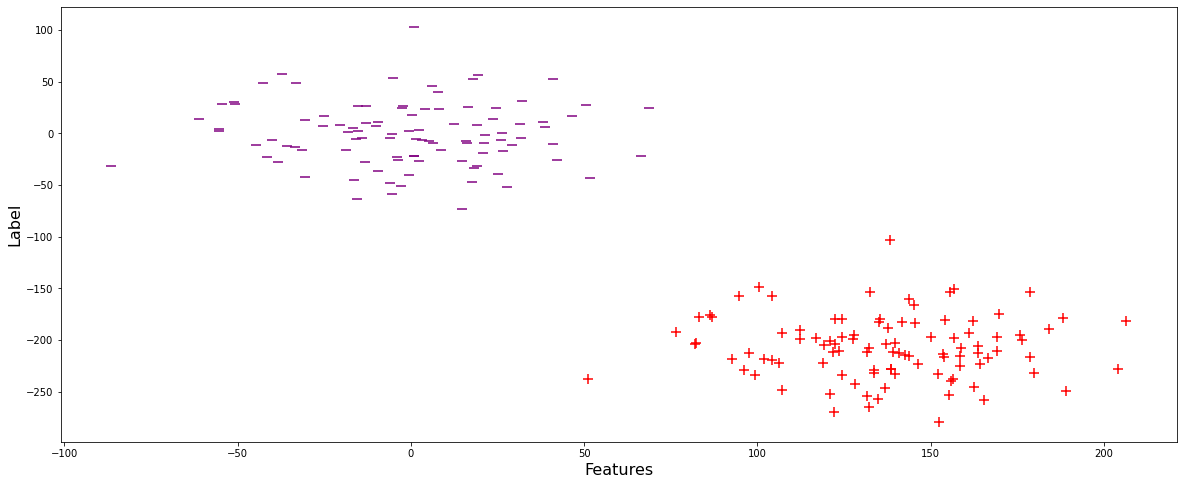

In [33]:
obt = making_df(slope_type=1,n=40)

df = obt[0]
p = obt[1]
q = obt[2]
r = obt[3]
s = obt[4]




plt.figure(figsize=(20,8))
plt.scatter(p, q, facecolors='purple', marker='_', s=100)
plt.scatter(r,s, facecolors='red',marker='+', s=100)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Label', fontsize=16)


plt.show()

In [34]:
def primary_fit(weight):

    def nor(lst):
        factor = (1/sum([i**2 for i in lst[:2]]))**0.5
        return [i*factor for i in lst[:2]]

    a = nor(weight)[0]
    b = nor(weight)[1]
    c = weight[2]



    def st(a,b,c):
        slope = -(a/b)
        intercept = -(c/b)

        x = np.concatenate([p,r])
        y = slope*x + intercept

        plt.plot(x,y)

        return [slope,intercept]



    plt.figure(figsize=(20,8))
    plt.scatter(p, q, facecolors='purple', marker='_', s=100)
    plt.scatter(r,s, facecolors='red',marker='+', s=100)
    plt.xlabel('Features', fontsize=16)
    plt.ylabel('Label', fontsize=16)

    st(a,b,c)
    plt.show()

In [ ]:
primary_fit([-1,1,110])

In [ ]:
primary_fit([-1,3,80])

In [ ]:
sup([-1,1,110])

In [ ]:
def sup(weight, epsilon=0, test_neg_pos=0, test_pos_pos=0, overfit=False, show=False):
    def nor(lst):
        factor = (1/sum([i**2 for i in lst[:2]]))**0.5
        return [i*factor for i in lst[:2]]

    a = nor(weight)[0]
    b = nor(weight)[1]
    c = weight[2]

    def st(a,b,c):
        slope = -(a/b)
        intercept = -(c/b)

        x = np.concatenate([p,r])
        y = slope*x + intercept

        return [x,y]


    df['distances'] = np.matmul(np.array(df.iloc[:,:3]),np.array([c,a,b]))

    df['formulation'] = df.label * df.distances
    
    if -(a/b)>0:
        df_neg = df[df.label<0].sort_values('formulation')
        df_pos = df[df.label>0].sort_values('formulation')
    elif -(a/b)<0:
        df_neg = df[df.label<0].sort_values('formulation', ascending=False)
        df_pos = df[df.label>0].sort_values('formulation', ascending=False)

        

    neg_dist = df_neg.formulation.values[0]
    pos_dist = df_pos.formulation.values[0]


    
    def vert_dist(distance):
        import math
        slope = -(a/b)
        angle = abs(math.degrees(math.atan(slope)))
        vertical = distance/math.cos(math.radians(angle))
        return vertical

    neg_vert_dist = vert_dist(neg_dist)
    pos_vert_dist = vert_dist(pos_dist)
    



    intercept = -(c/b)
    pos_intercept = intercept + pos_vert_dist
    neg_intercept = intercept - neg_vert_dist
    c_intercept = min([neg_intercept, pos_intercept]) + abs((neg_intercept - pos_intercept)/2)

    c_pos = -(pos_intercept*b)
    c_neg = -(neg_intercept*b)
    c_new = -(c_intercept*b)



#     if epsilon != 0:
        
    margin = (neg_dist+pos_dist)*(1-epsilon)
    distance = margin/2
    dist_vert_dist = vert_dist(distance)

    pos_intercept = c_intercept + dist_vert_dist
    neg_intercept = c_intercept - dist_vert_dist
    c_pos_new = -(pos_intercept*b)
    c_neg_new = -(neg_intercept*b) 


    plt.figure(figsize=(20,8))
    plt.scatter(p, q, facecolors='purple', marker='_', s=100)
    plt.scatter(r,s, facecolors='red', marker='+', s=100)
    plt.xlabel('Features', fontsize=16)
    plt.ylabel('Label', fontsize=16)

    plt.plot(st(a,b,c_new)[0], st(a,b,c_new)[1], linewidth=4, label='classifier')
    
    if not overfit:
        plt.plot(st(a,b,c_pos)[0], st(a,b,c_pos)[1], '--', linewidth=1, alpha=0.8, label='negative margin')   
        plt.plot(st(a,b,c_neg)[0], st(a,b,c_neg)[1], '--', linewidth=1, alpha=0.8, label='positive margin')
    else:
        show = True
    
    
    if show:
        plt.plot(st(a,b,c_pos_new)[0], st(a,b,c_pos_new)[1], '--', linewidth=1, alpha=0.3, label='soft negative margin')   
        plt.plot(st(a,b,c_neg_new)[0], st(a,b,c_neg_new)[1], '--', linewidth=1, alpha=0.3, label='soft positive margin')
    
    
    if epsilon > 0:
        x = np.random.randint(min(df.feature1.values),max(df.feature1.values))
        plt.scatter(x, -(a/b)*x - (c_pos_new/b)+test_neg_pos, c='purple', s=100)
        
#         if show:
#             x = np.arange(min(df.feature1.values),max(df.feature1.values))
#             y = [-(a/b)*i - (c_pos_new/b)+test_neg_pos for i in x]
#             plt.plot(x, y, '--', linewidth=1, alpha=0.5, label='positive margin')

        x = np.random.randint(min(df.feature1.values),max(df.feature1.values))
        plt.scatter(x, -(a/b)*x - (c_neg_new/b)+test_pos_pos, c='red', s=100)
        
#         if show:
#             x = np.arange(min(df.feature1.values),max(df.feature1.values))
#             y = [-(a/b)*i - (c_neg_new/b)+test_pos_pos for i in x]
#             plt.plot(x, y, '--', linewidth=1, alpha=0.5, label='positive margin')
    
    
    plt.legend(fontsize=12)
    plt.show()

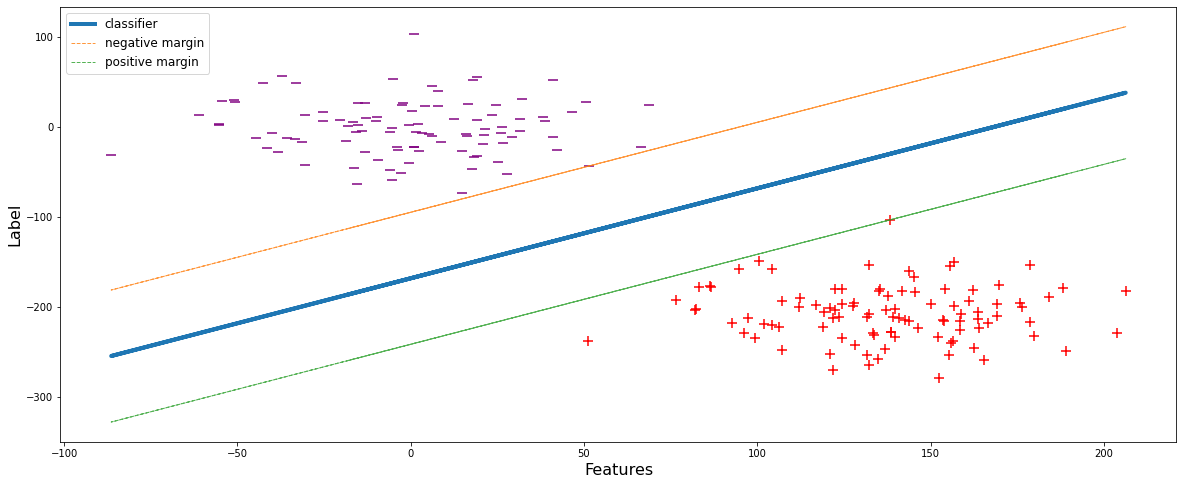

In [3]:
obt = making_df(slope_type=1,n=40)

df = obt[0]
p = obt[1]
q = obt[2]
r = obt[3]
s = obt[4]

weights = [-1,1,110]
sup(weights)

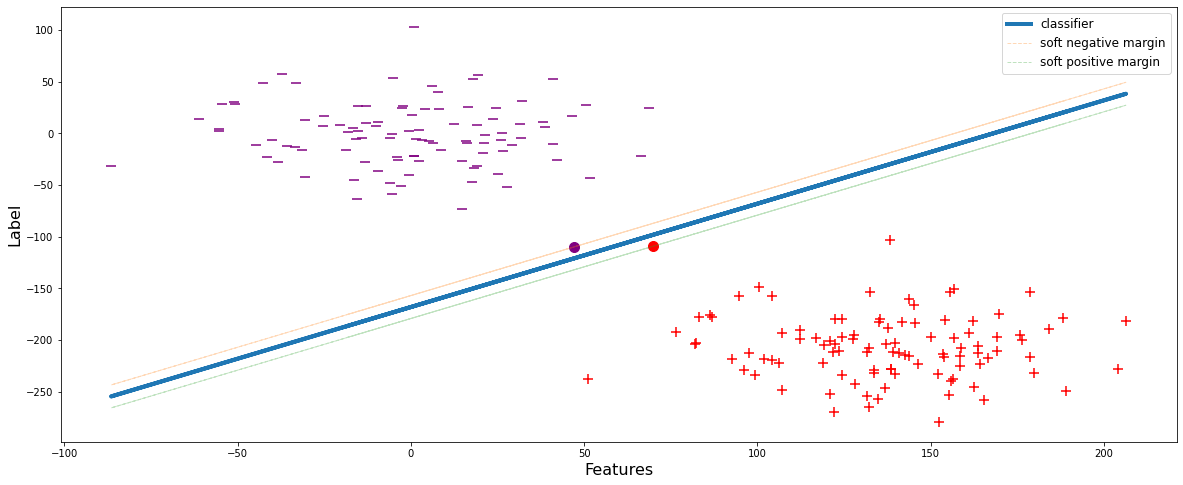

In [6]:
sup(weights, overfit=True)

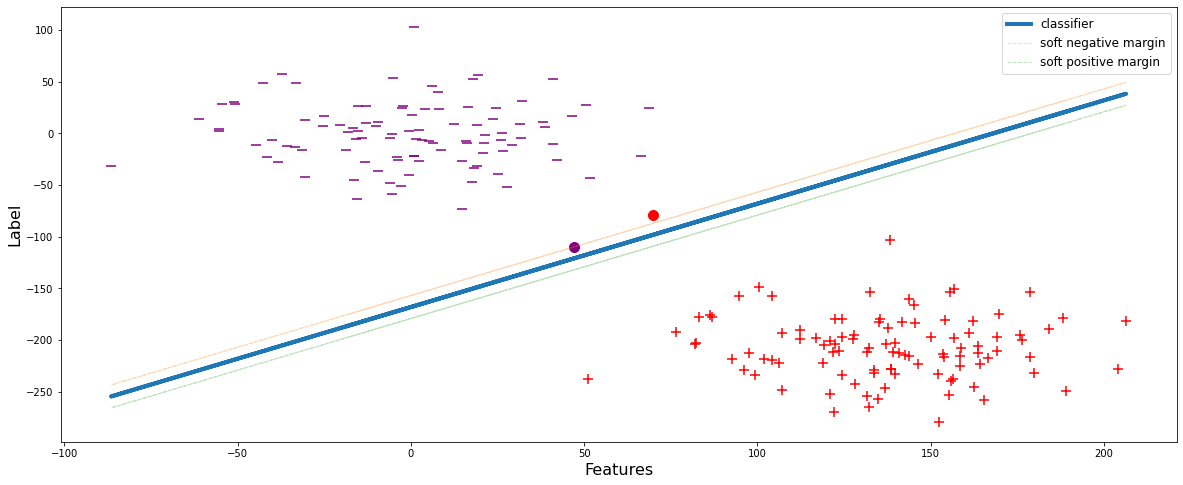

In [13]:
sup(weights, overfit=True, test_pos_pos=30)

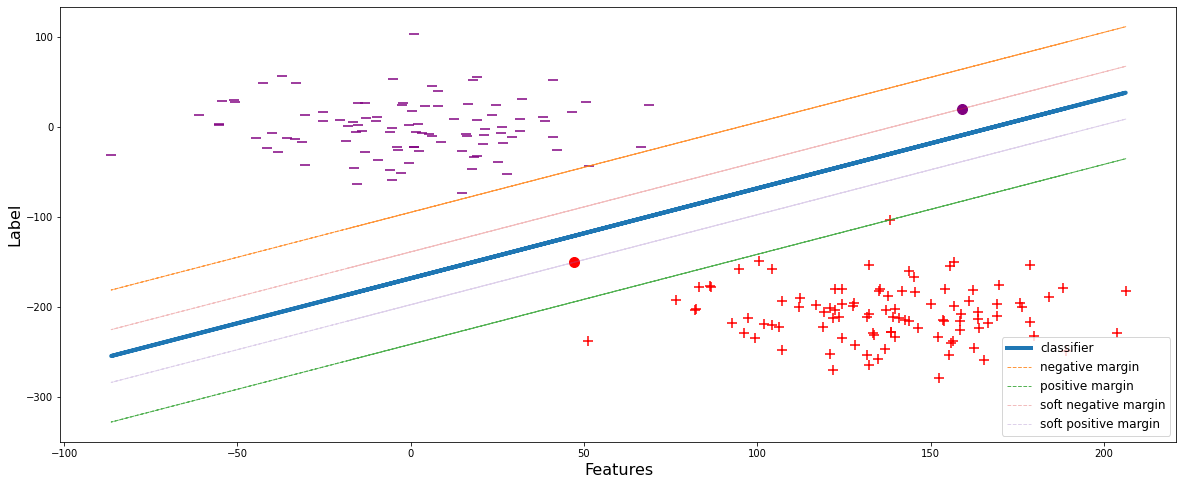

In [17]:
sup(weights, epsilon=0.6, show=True)

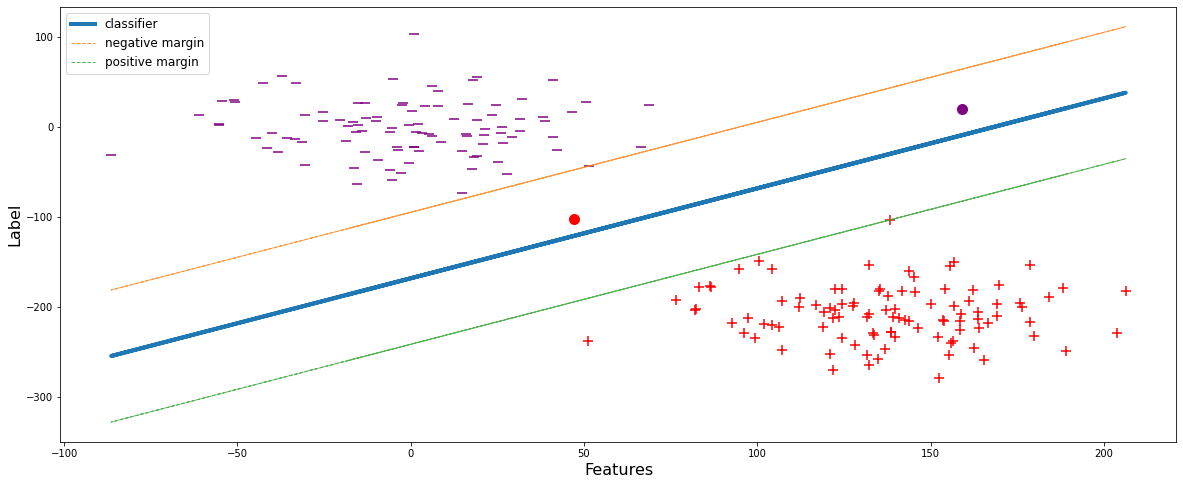

In [27]:
sup(weights, epsilon=0.6, test_pos_pos=48)

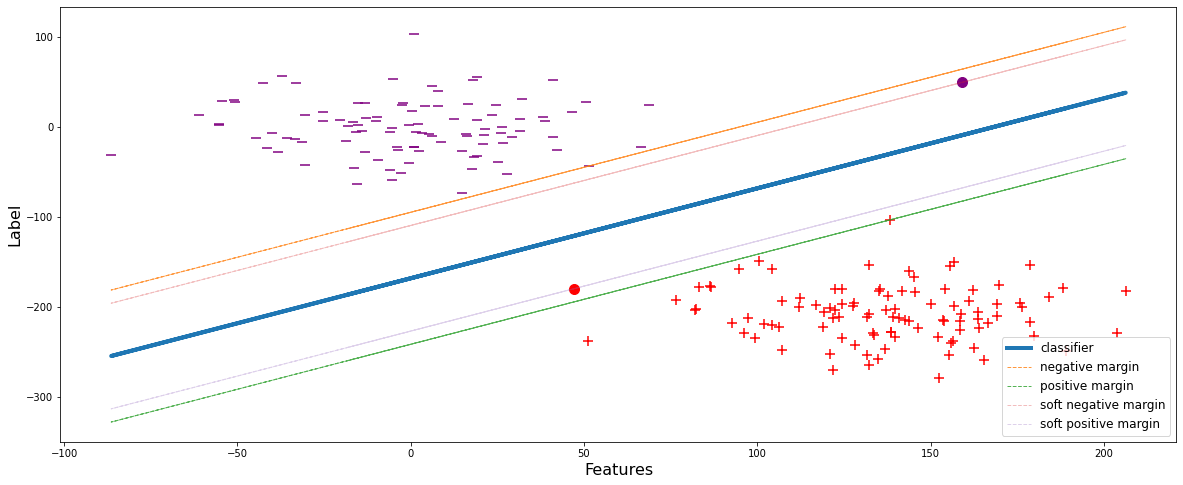

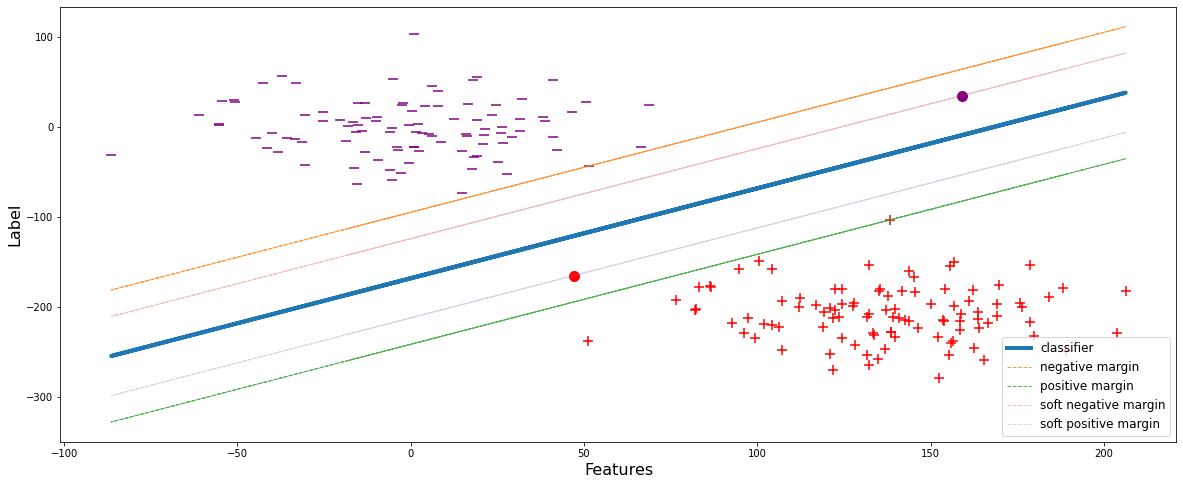

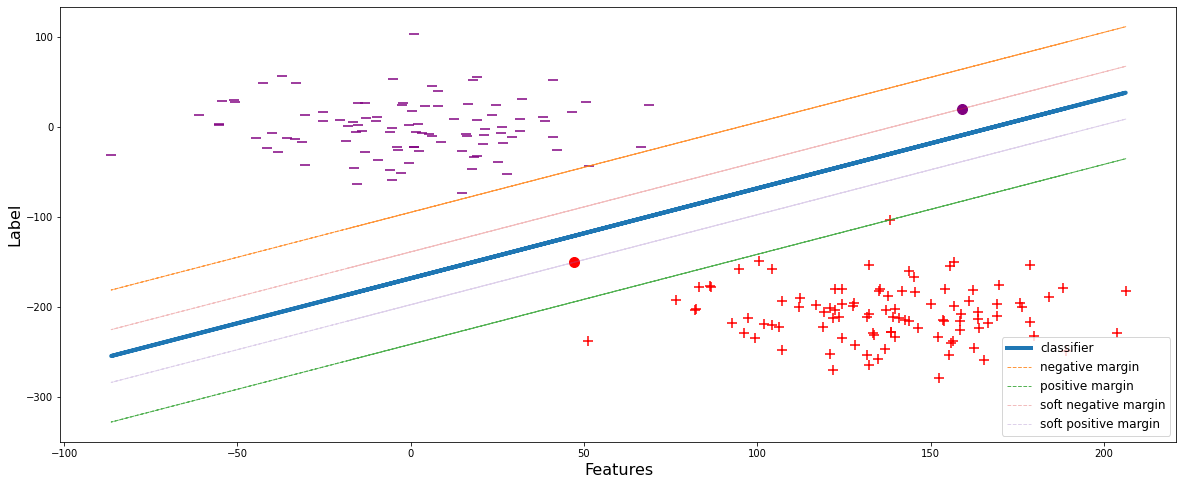

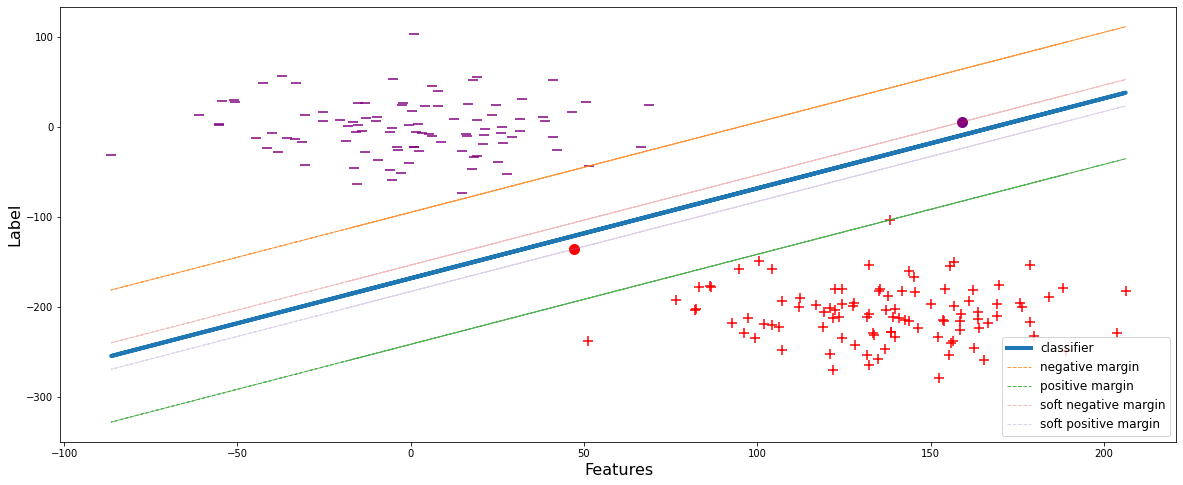

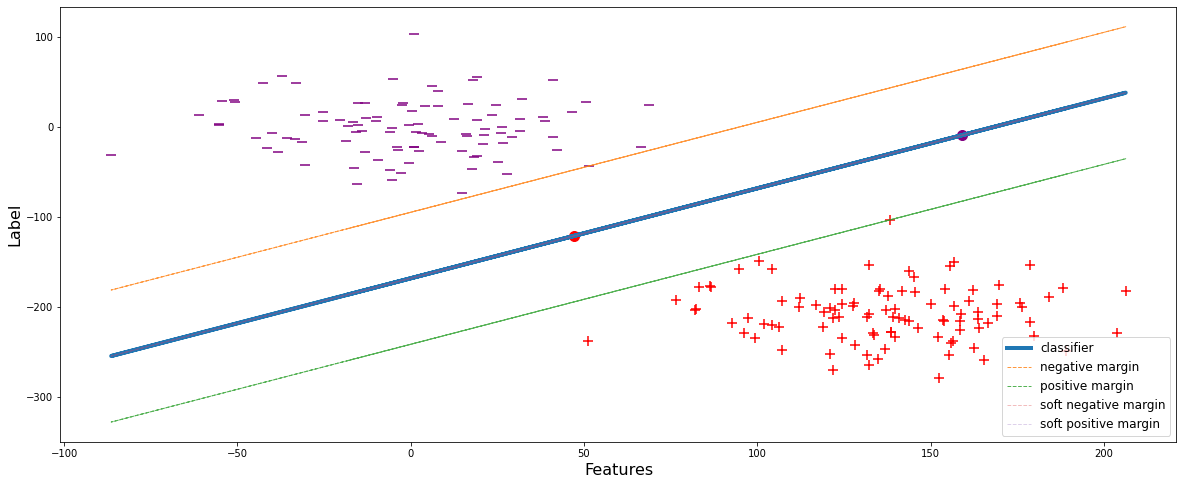

In [32]:
for i in np.arange(0.2,1.1,0.2):
    sup(weights, epsilon=i, show=True)

In [31]:
np.arange(0.2,1.1,0.2)

array([0.2, 0.4, 0.6, 0.8, 1. ])

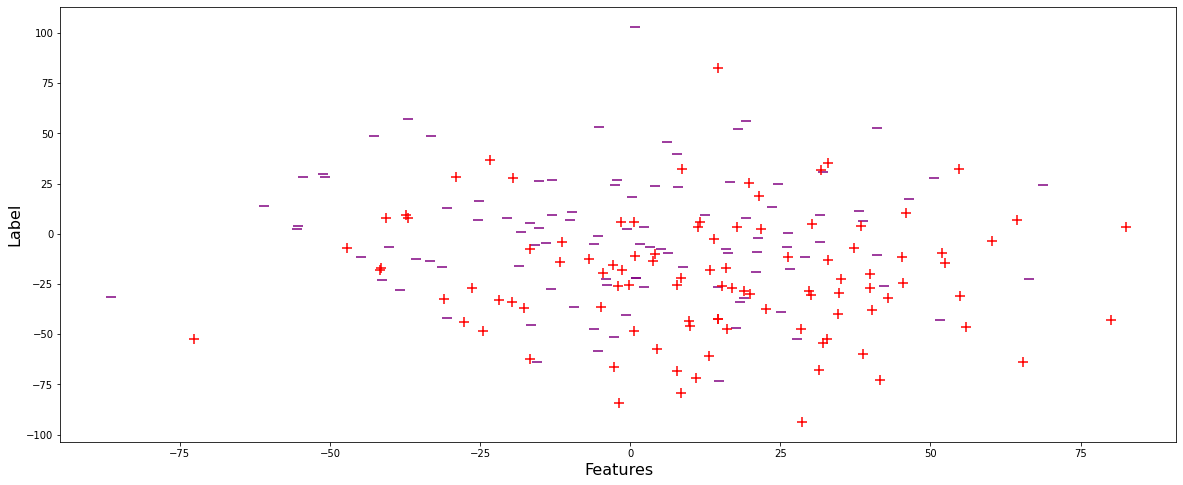

In [39]:
obt = making_df(slope_type=1,n=40,p3=0.2)

df = obt[0]
p = obt[1]
q = obt[2]
r = obt[3]
s = obt[4]




plt.figure(figsize=(20,8))
plt.scatter(p, q, facecolors='purple', marker='_', s=100)
plt.scatter(r,s, facecolors='red',marker='+', s=100)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Label', fontsize=16)


plt.show()

In [43]:
df['feature1_square'] = df.feature1**2
df['feature2_square'] = df.feature2**2
df['feature_1*2'] = df.feature1 * df.feature2

In [45]:
df['feature_1*2']

43    -347.855924
43       4.251284
90    2170.585825
83     607.568920
27    -252.378462
         ...     
66    1169.616542
95      -1.150800
29    -435.090794
29   -1712.791153
61     -61.154278
Name: feature_1*2, Length: 200, dtype: float64

In [44]:
df

ones   feature1   feature2  label  feature1_square  feature2_square  \
43   1.0 -13.050023  26.655579    1.0       170.303107       710.519884   
43   1.0   0.704919   6.030885   -1.0         0.496911        36.371576   
90   1.0  41.085828  52.830525    1.0      1688.045231      2791.064324   
83   1.0  24.697661  24.600261    1.0       609.974470       605.172856   
27   1.0   4.413575 -57.182327   -1.0        19.479640      3269.818477   
..   ...        ...        ...    ...              ...              ...   
66   1.0  33.018548  35.423015   -1.0      1090.224533      1254.790013   
95   1.0  -0.471699   2.439693    1.0         0.222499         5.952102   
29   1.0  41.142264 -10.575276    1.0      1692.685854       111.836463   
29   1.0  54.897206 -31.199970   -1.0      3013.703189       973.438109   
61   1.0  -2.534391  24.129771    1.0         6.423138       582.245858   

    feature_1*2  
43  -347.855924  
43     4.251284  
90  2170.585825  
83   607.568920  
27  -252.378462  
..          ...  
66  1169.616542  
95    -1.150800  
29  -435.090794  
29 -1712.791153  
61   -61.154278  

[200 rows x 7 columns]

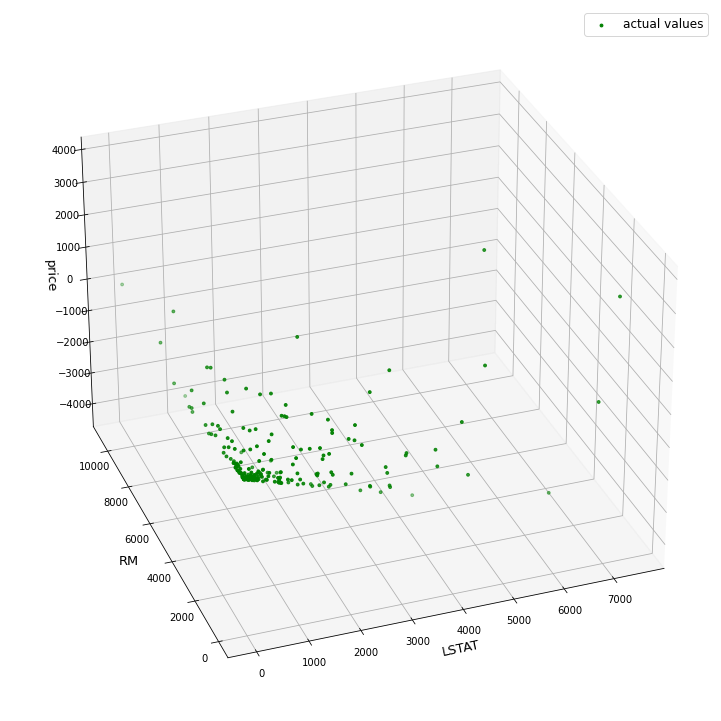

NameError: name 'mean_squared_error' is not defined

In [47]:
# lr_multi = LinearRegression().fit(X,y)
# lr_preds = lr_multi.predict(X)
 
# Creating dataset
a = np.array(df.feature1_square)
b = np.array(df.feature2_square)
c = np.array(df['feature_1*2'])
# p = lr_preds
  
# Creating figure
plt.figure(figsize = (13,13))
ax = plt.axes(projection ="3d")
  
# Creating plot
ax.scatter3D(a, b, c, color = "green", s=8, label='actual values')
# ax.scatter3D(a, b, p, color = "magenta", s=8, label='predicted values')
 
ax. set_xlabel('LSTAT', fontsize=13)
ax. set_ylabel('RM', fontsize=13)
ax. set_zlabel('price', fontsize=13)
plt.legend(fontsize=12)
 
ax.view_init(30,250)
  
# show plot
plt.show()
 
 
 
print('Cost =',mean_squared_error(y,lr_preds))

In [111]:
x = np.linspace(-5.0, 2.0, 100)
y = np.sqrt(10**2 + x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1 = np.linspace(-5.0, 2.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)

df.head()

X1        X2  Y
0  11.180340 -5.000000  0
1  11.148898 -4.929293  0
2  11.117817 -4.858586  0
3  11.087100 -4.787879  0
4  11.056749 -4.717172  0

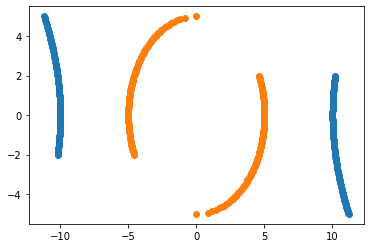

In [112]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.show()

In [113]:
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1X2'] = (df['X1'] *df['X2'])
df.head()

X1        X2  Y   X1_Square  X2_Square       X1X2
0  11.180340 -5.000000  0  125.000000  25.000000 -55.901699
1  11.148898 -4.929293  0  124.297929  24.297929 -54.956185
2  11.117817 -4.858586  0  123.605857  23.605857 -54.016869
3  11.087100 -4.787879  0  122.923783  22.923783 -53.083690
4  11.056749 -4.717172  0  122.251709  22.251709 -52.156586

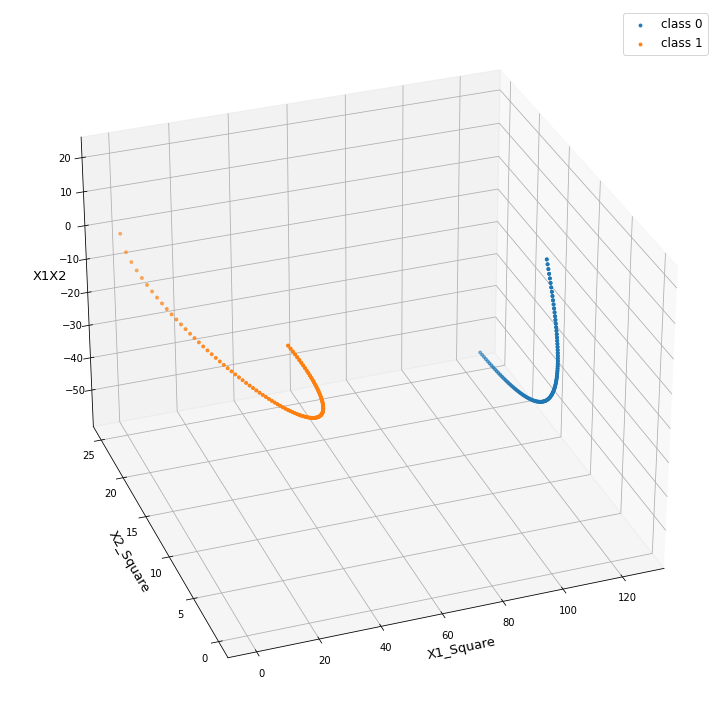

In [117]:
# Creating dataset
df1 = df[df.Y==0]
a = np.array(df1.X1_Square)
b = np.array(df1.X2_Square)
c = np.array(df1.X1X2)
# p = lr_preds
  
# Creating figure
plt.figure(figsize = (13,13))
ax = plt.axes(projection ="3d")
  
# Creating plot
ax.scatter3D(a, b, c, s=8, label='class 0')



# Creating dataset
df1 = df[df.Y==1]
a = np.array(df1.X1_Square)
b = np.array(df1.X2_Square)
c = np.array(df1.X1X2)

  
# Creating plot
ax.scatter3D(a, b, c, s=8, label='class 1')


 
ax. set_xlabel('X1_Square', fontsize=13)
ax. set_ylabel('X2_Square', fontsize=13)
ax. set_zlabel('X1X2', fontsize=13)
plt.legend(fontsize=12)
 
ax.view_init(30,250)
  
# show plot
plt.show()